In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import random

In [2]:
ExE = pd.read_csv('../../extracted_data/ExE_imputed_5.csv', sep = ',', index_col = 0)

In [3]:
embeddings = pd.read_csv('../../extracted_data/yeast_emb_embeddings_yeastnet_genex.csv', sep = ',', index_col = 0)
embeddings = embeddings.reset_index().set_index('gene_id')
ExE_embeddings = ExE.merge(embeddings, on='gene_id', how='inner')


R2:  0.0004945607997585144
RMSE: 0.11270866571627315


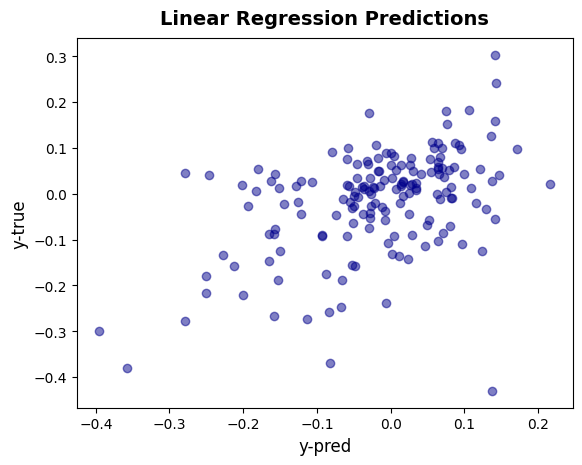

In [4]:
random.seed(36)

target_column = random.choice(ExE.columns)  # Randomly pick a column name

X = ExE_embeddings.drop(columns=[target_column])  # Features (all columns except the target)
y = ExE_embeddings[target_column]  # Target variable (the randomly selected column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()


try the same after Running PCA?

0.9999982020404535


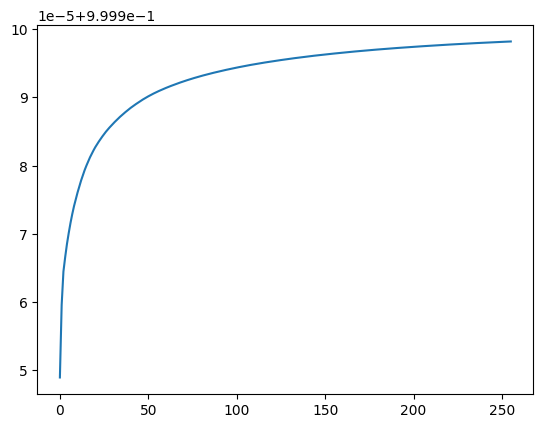

In [5]:
# Check what is the percentage of the variance explained by compressed data compared to the full data 
N=256
pca = PCA(n_components=N)
pca.fit_transform(X)
ev = pca.explained_variance_ratio_.cumsum()
print(ev[-1])
plt.plot(range(0, N), ev)

In [6]:
dims = 256
ExE_PCA = pd.DataFrame(PCA(n_components=dims).fit_transform(X))
ExE_PCA

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,3326.397186,12.153362,1.998394,2.190285,2.856051,0.875737,-1.968363,3.453682,0.429734,2.240275,...,0.015706,-0.180840,0.250534,0.071006,-0.017577,0.017359,-0.073187,-0.111927,-0.035595,0.024665
1,3326.397189,12.156473,2.009846,2.183258,2.851775,0.877121,-1.966568,3.452845,0.432188,2.239769,...,0.069170,-0.099027,0.316228,0.136440,-0.020146,-0.001855,-0.018686,-0.054479,0.040615,-0.046285
2,-2702.606363,9.068484,-4.048029,-3.317845,-3.002289,-0.823483,-1.277998,-1.554739,0.978005,1.270961,...,0.078180,0.116295,-0.137646,0.091667,0.021116,0.098959,0.200351,0.170579,-0.083173,0.114975
3,-2702.606343,9.074991,-4.028159,-3.275556,-2.972950,-0.748665,-1.260620,-1.623613,0.959000,1.239115,...,0.043266,0.289381,0.020736,0.232590,-0.004100,-0.057522,0.138343,0.147561,0.027940,0.077381
4,-2138.604089,4.083075,3.141011,5.251145,-0.468363,-4.172298,-0.135288,-1.119645,0.973647,0.836128,...,-0.191526,0.102880,-0.059930,0.413833,-0.183234,0.008625,0.057781,-0.363277,-0.257066,-0.310760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,-3143.604274,12.513899,1.603350,-4.986375,-1.130158,0.067720,0.283825,-1.550357,0.696596,0.275372,...,-0.141504,-0.215970,-0.063010,-0.224807,0.141437,0.236647,-0.160423,0.112476,0.306010,0.105267
820,-2741.605184,-1.217742,2.406296,3.249085,-2.257684,-0.074418,-1.470879,0.894494,0.682955,-0.343624,...,-0.044101,0.030135,0.204378,-0.096228,0.218790,0.056195,-0.239742,-0.338100,0.170075,0.193399
821,-654.606051,-0.976869,0.505866,-2.996236,-0.646743,-2.189141,-0.560188,-3.161325,-0.160181,0.177230,...,-0.230143,0.016449,0.183205,0.101844,-0.073650,0.336988,-0.014091,0.088648,-0.049844,-0.232139
822,1176.394002,-4.178438,-1.483512,1.744637,-0.924662,-0.793989,2.929921,5.169580,2.400304,1.468942,...,0.067121,-0.191151,0.368438,-0.057839,-0.329225,0.235959,-0.415423,0.045556,-0.278150,-0.156235


R2:  -0.010554058014132561
RMSE: 0.11332989926913255


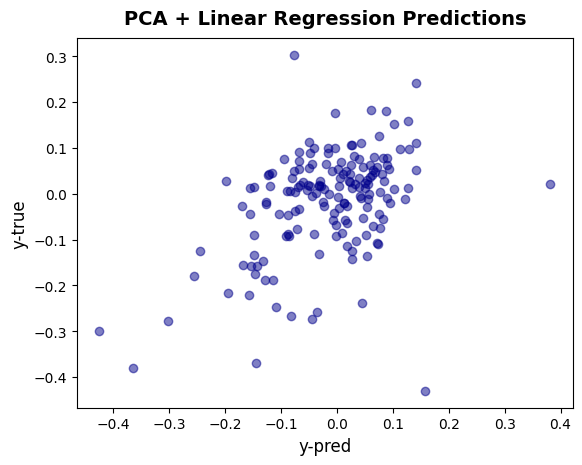

In [7]:
X_train, X_test, y_train, y_test = train_test_split(ExE_PCA, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)


print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("PCA + Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

## Try other models

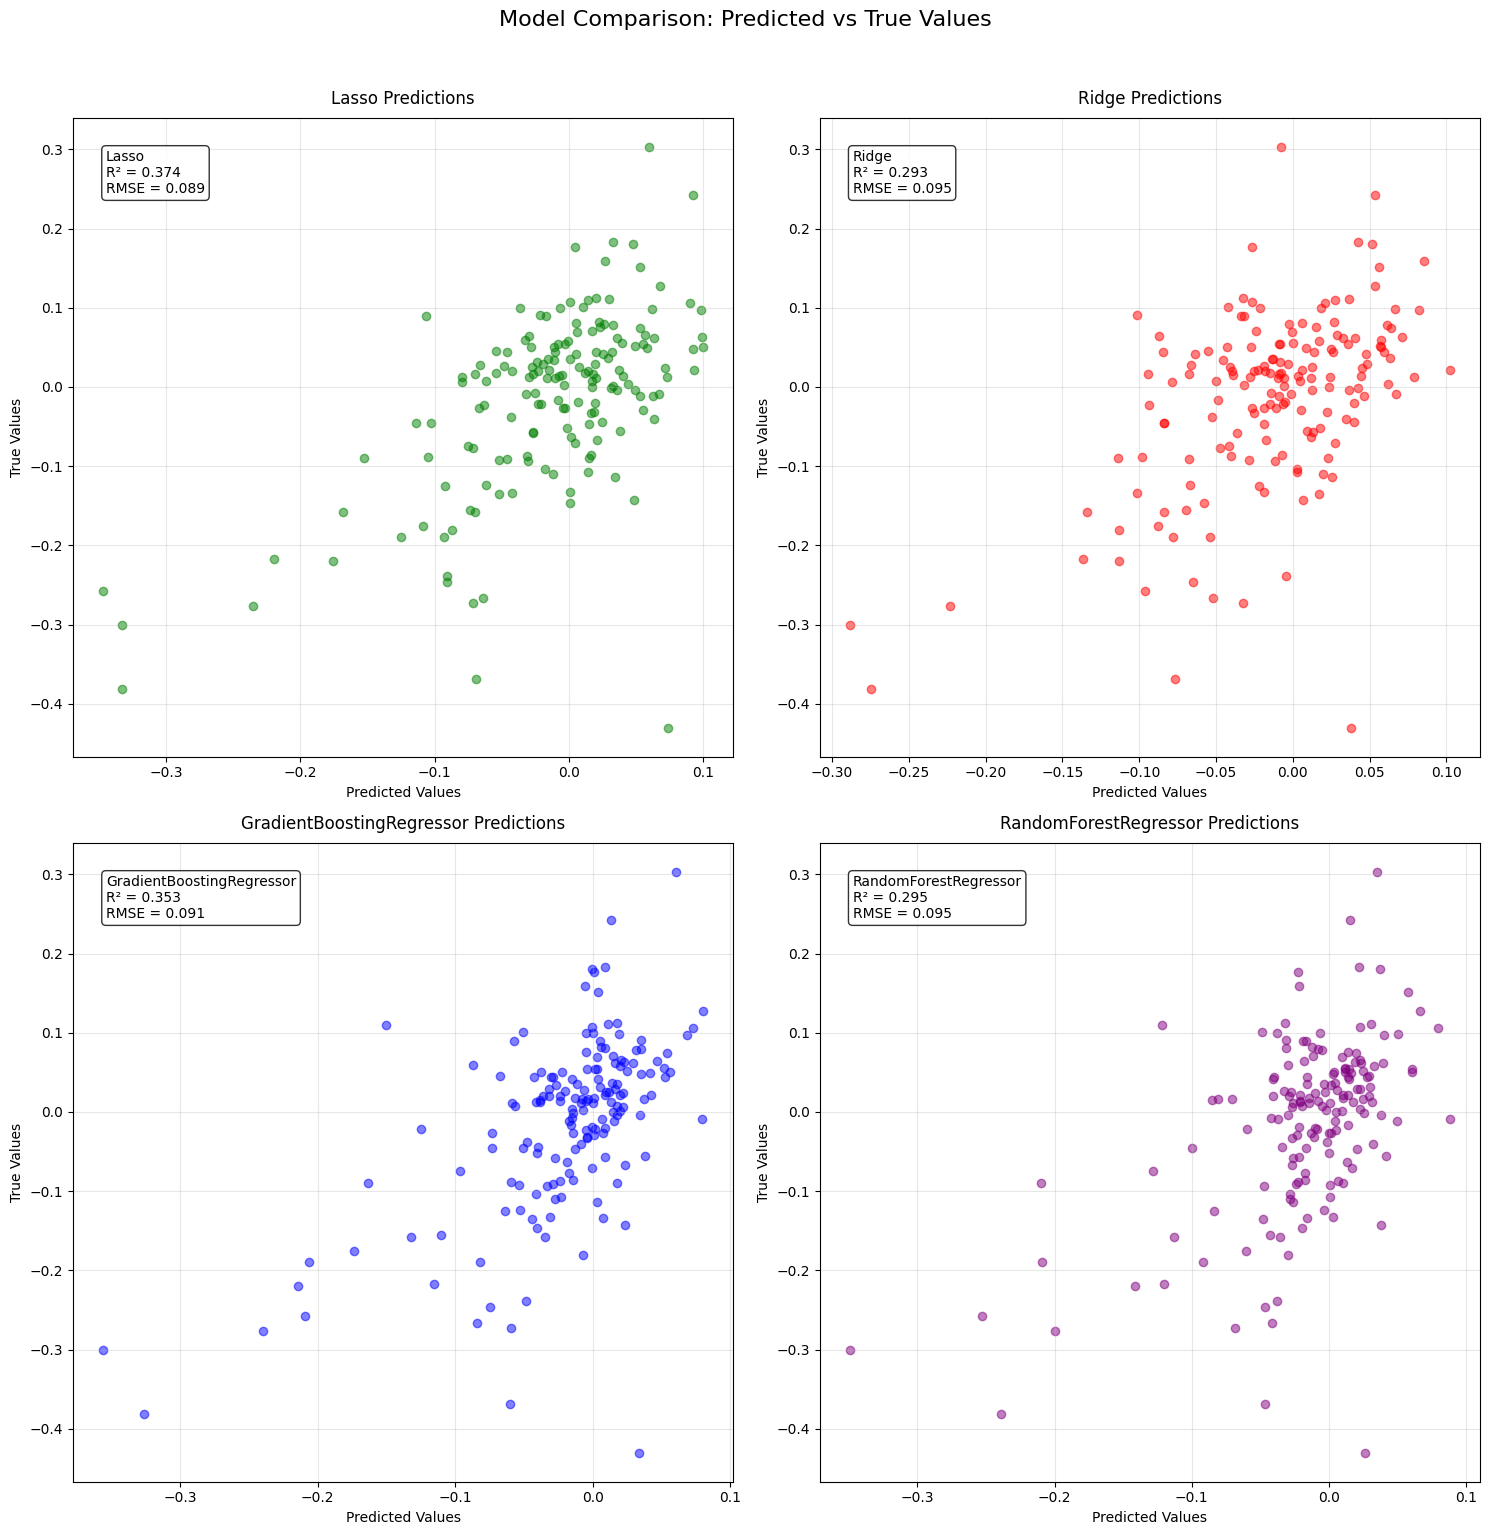

In [8]:
predictive_models = [  
                      Lasso(alpha=0.0005),
                      Ridge(alpha=50.0),
                      GradientBoostingRegressor(n_estimators=20, learning_rate=0.2, max_depth=3, random_state=48),
                      RandomForestRegressor(n_estimators=20, random_state=42)
]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Model Comparison: Predicted vs True Values', fontsize=16, y=1.02)

axes = axes.ravel()

colors = ['green', 'red', 'blue', 'purple']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for idx, (model, ax, color) in enumerate(zip(predictive_models, axes, colors)):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    ax.scatter(y_pred, y_test, alpha=0.5, color=color)
        
    model_name = model.__class__.__name__
    ax.text(0.05, 0.95, 
            f'{model_name}\nR² = {r2:.3f}\nRMSE = {rmse:.3f}',
            transform=ax.transAxes,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('True Values')
    ax.set_title(f'{model_name} Predictions', pad=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 214.4902 - mse: 214.4902 - val_loss: 3.0155 - val_mse: 3.0155
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2877 - mse: 1.2877 - val_loss: 0.0442 - val_mse: 0.0442
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1155 - mse: 0.1155 - val_loss: 0.0548 - val_mse: 0.0548
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0320 - mse: 0.0320 - val_loss: 0.0268 - val_mse: 0.0268
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0137 - m

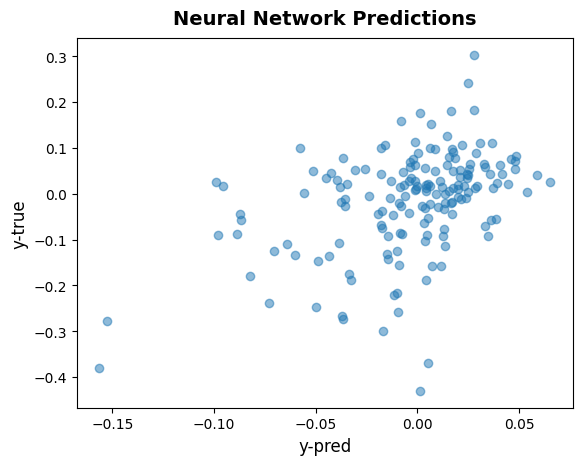

In [13]:
# And Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

loss, mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Neural Network Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()